In [92]:
import requests
import xmltodict
import pandas as pd

API_KEY="3tH0Cy1aSWuHpkvdHjT5AR%2FTJDe6KfqaOS0LKBxWFuvmz83HCol4uIzR%2BKItfRE8xEBuB5ARn%2B7WZxsuHbLJ7g%3D%3D"
API_KEY_decode = requests.utils.unquote(API_KEY)
API_KEY_decode

'3tH0Cy1aSWuHpkvdHjT5AR/TJDe6KfqaOS0LKBxWFuvmz83HCol4uIzR+KItfRE8xEBuB5ARn+7WZxsuHbLJ7g=='

In [69]:
### 월별 입국자수 데이터 엑셀 다운로드

import requests
import xmltodict
import pandas as pd

API_KEY="3tH0Cy1aSWuHpkvdHjT5AR%2FTJDe6KfqaOS0LKBxWFuvmz83HCol4uIzR%2BKItfRE8xEBuB5ARn%2B7WZxsuHbLJ7g%3D%3D"
API_KEY_decode = requests.utils.unquote(API_KEY)
year = '2020'
req_url = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getForeignTuristStatsList"
dir_name = 'C:/myPyCode/data/project/foreigntourist/'+ year 
num_of_rows = 15000

for k in range(5):
    mm = '{0:02d}'.format(k+1)
    
    ym = int(year + mm)
    req_parameter={
        "ServiceKey":API_KEY_decode,
        "YM":ym,
        "numOfRows":num_of_rows,
    }
    
    r = requests.get(req_url, params = req_parameter)
    xml_data = r.text
    dict_data = xmltodict.parse(xml_data)
    dict_data
    
    dict_data=dict_data['response']['body']['items']['item']
    df = pd.DataFrame(dict_data)
    
    file_name = dir_name + mm+'.csv'
    print(file_name)  
    df.to_csv(file_name, mode='w', encoding='euc-kr')

C:/myPyCode/data/project/foreigntourist/202001.csv
C:/myPyCode/data/project/foreigntourist/202002.csv
C:/myPyCode/data/project/foreigntourist/202003.csv
C:/myPyCode/data/project/foreigntourist/202004.csv
C:/myPyCode/data/project/foreigntourist/202005.csv


In [107]:
## 국가별 매월 입국자수
nat_table = []
year = '2020'

for k in range(5):
    mm = '{0:02d}'.format(k+1)
    data_file = 'C:/myPyCode/data/project/foreigntourist/'+year+mm+'.csv'
    
    df = pd.read_csv(data_file, encoding='euc-kr')
    nat_df = df.iloc[:,[3,5]]
    
    ## 국가 코드 : 미국, 호주, 캐나다, 일본, 중국, 태국, 영국, 프랑스, 독일
    nat_cd = [275, 404, 213, 130, 112, 170, 316, 321, 324]
    count = []

    for cd in nat_cd:
        temp = nat_df.groupby('natCd').sum().sort_values(by='num',ascending =False)
        count.append(temp.loc[cd].num)
    nat_table.append(count)

df_nat = pd.DataFrame(nat_table)
df_nat.columns = ['미국','호주','캐나다','일본','중국','태국','영국','프랑스','독일']

df_nat["월"]=[1,2,3,4,5]
df_nat = df_nat.set_index("월")

df_nat

,미국,호주,캐나다,일본,중국,태국,영국,프랑스,독일
월,,,,,,,,,
1,67255,14039,13809,203969,481681,38466,9117,5982,6617
2,42439,6857,9046,211199,104086,31777,5566,5120,5599
3,10570,760,2405,8347,16595,2371,1173,1217,1195
4,6417,124,422,360,3935,299,298,280,1033
5,8735,137,695,413,5124,195,374,157,1754


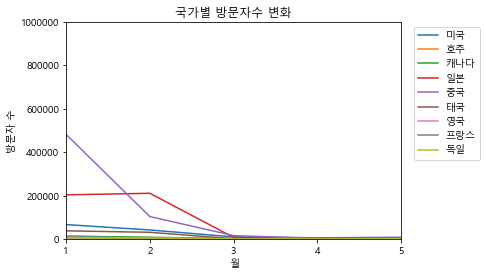

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

nat_plot = df_nat.plot()

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False


plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

plt.xticks(range(len(df_nat.index)+1), range(0,13))
plt.axis([1, 5, 0, 1000000])
plt.xlabel('월')
plt.ylabel('방문자 수')
plt.title('국가별 방문자수 변화')
plt.show()

(0, 8500000)

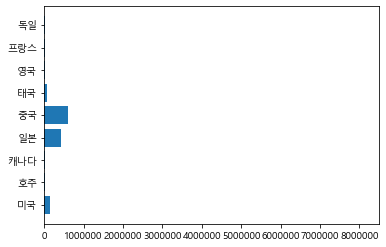

In [109]:
import numpy as np

year_data = df_nat.sum()
plt.barh(df_nat.columns, year_data)
plt.xlim(0,8500000)
